In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
% matplotlib inline

In [41]:
# Read in weather data 
weather_filename = 'fort_lauderdale.csv'
weather_file = open(weather_filename)
weather_data = weather_file.read()
weather_file.close()

In [42]:
# Break the weather data into lines 
lines = weather_data.split('\n')
print(len(lines))
for i in range(5):
    print(lines[i])

23790
COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP
83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,3,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,4,-99.99000,-99.90000,-99.90000, -99.90000


In [43]:
labels = lines[0]
values = lines[1:]
n_values = len(values)
print(labels)

COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP


In [44]:
# From single line to list of values
year = []
month = []
day = []
max_temp = []
j_year = 1
j_month = 2 
j_day = 3
j_max_temp = 5

In [45]:
for i_row in range(n_values):
    split_values = values[i_row].split(',')
    if len(split_values) >= j_max_temp:
        year.append(int(split_values[j_year]))
        month.append(int(split_values[j_month]))
        day.append(int(split_values[j_day]))
        max_temp.append(float(split_values[j_max_temp]))

In [46]:
# Making sure that our splitting pricess is ok
for i_day in range(100):
    print(max_temp[i_day])

-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
80.0
82.0
83.0
83.0
85.0
85.0
70.0
75.0
75.0


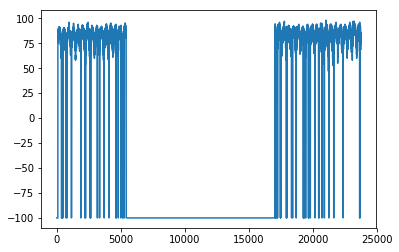

In [47]:
plt.plot(max_temp)

The temperature values fall roughly in between 50 and 100. Temperature falls to -99 in between at regular intervals which confirms our finding about the leap year temperatures. And in the middle we have a whole lot of data missing from 1966 to 1998 which we also indicated while data inspection. 

The next task is to exact the not NAN data. We have to be careful about some things particularly in this case. This is a time series data which means that the order in which rows are ordered is important. Also time gap between consecutive rows is important. From the max. temperature graph it can be seen that data is bundled in two regions and there is a huge gap in between. We can neglect the first bundle for the following reasons : 
* Since we have huge missing data in between we will not be able to capture the effect of bundle while prediction. 
* Not necessarily today's temperature depends on the temperature 50 years back. 

By visual inspection we see that mid of this data while lie on a missing value. 

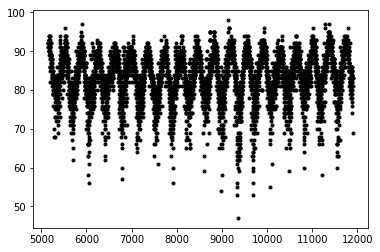

In [48]:
# Isolate recent data 
i_mid = len(max_temp) // 2 
temps = np.array(max_temp[i_mid:])
temps[np.where(temps == -99.9)] = np.nan # Substitute missing data with NAN value
plt.plot(temps,color='black',marker='.',linestyle='none')

Numpy handles NAN values very well. This is reflected in this plot which is much cleaner than the previous one. There are clear annual fluctuations in the max temperature which are due to winter and summer season. Also, if we zoom this plot we will observe that in fact that temperature values are whole numbers and not in decimal points as we had pointed out in data inspection. 

In [49]:
# Remove NANs from dataset
# Trim the array from the beginning so that it starts from a non NAN value
#print(np.where(np.isnan(temps))[0])
#print(np.where(np.logical_not(np.isnan(temps)))[0][0]) # location of first non-NAN item
t_start = np.where(np.logical_not(np.isnan(temps)))[0][0]
temps = temps[t_start:]
#print(np.where(np.isnan(temps))[0])
i_nans = np.where(np.isnan(temps))[0]
#print(np.diff(i_nans))

What should we do with the missing values in between? We can trim off the ones in the beginning and the end. Since we are working with a time series data we cannot just remove these NANs. The order and spacing between consecutive data is important. We we randomly remove values from between any phenomena which might depend on the time difference might break down. So we need to keep all of our observations. So using one method or another we have to make a reasonable guess about our missing values. 

Luckily for us we are working with weather! We know that the weather in a given week and season tends to be roughly the same. There aren't big changes and we can resonably assume that the high temperature tomorrow will be somewhere in the neighbourhood of the high temperature today. 

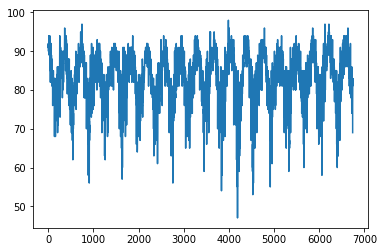

In [50]:
for i in range(temps.size):
    if np.isnan(temps[i]):
        temps[i] = temps[i - 1]
        
plt.plot(temps)  

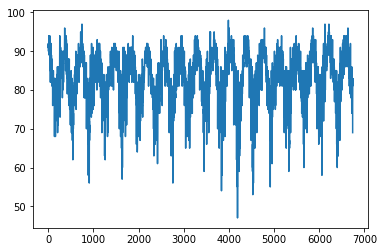

In [54]:
n_days = temps.size
days = np.arange(n_days)
plt.plot(days, temps)

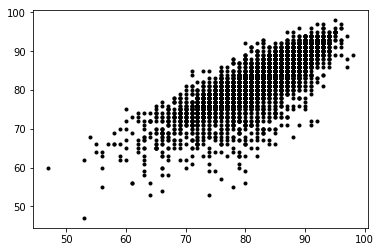

In [55]:
# Determine if previous day's temperature is related to 
# that f the following day
plt.plot(temps[:-1], temps[1:],color='black', marker='.',linestyle='none')

Since the temperatures were reported in whole numbers, we cannot make out from this plot if some points sit on top of each other. Adding a _jitter_ solves the problem. 

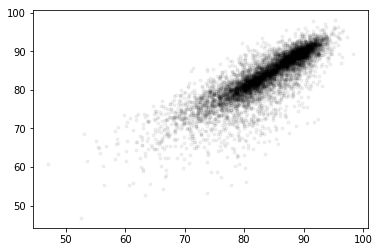

In [60]:
def scatter(x,y):
    """"
    Make a scatter plot with jitter.
    """
    x_jitter = x + np.random.normal(size=x.size, scale=0.5)
    y_jitter = y + np.random.normal(size=y.size, scale=0.5)
    plt.plot(
        x_jitter, y_jitter,
        color='black',
        marker='.',
        linestyle='none',
        alpha=0.1
    )
scatter(temps[:-1], temps[1:])

0.7594840373515716


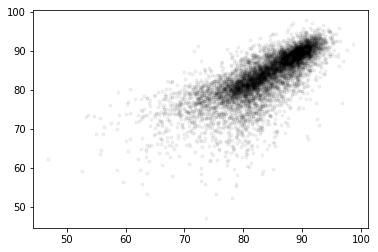

In [64]:
shift = 2
scatter(temps[:-shift], temps[shift:])
print(np.corrcoef(temps[:-shift], temps[shift:])[0,1])